In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from matplotlib.patches import Rectangle
import seaborn as sns

In [2]:
pw_path = '/mnt/c/Users/xpn381/Documents/data/lpw.txt'
file = open(pw_path, mode='r')
pw = file.read()

In [3]:
!echo $pw|sudo -S sudo -S mount -t drvfs d: /mnt/f


[sudo] password for xpn381: mount: /mnt/f: d: already mounted on /mnt/f.


In [4]:
image_dir = "/mnt/f/OctoberJohanArchiveSample5k"
data_dir = "/mnt/f/OD_xenia_5k_test"

In [5]:
def get_classes(data_dir):

    classes_path = f'{data_dir}/classes.txt' 
    txt = open(classes_path, mode = 'r')
    classes = txt.read().split('\n')
    txt.close()

    return(classes)

In [6]:
def get_data(data_dir):

    yolo = []
    voc = []
    names = []

    for root, dirs, files in os.walk(data_dir):
        for name in files:

            if name == 'classes.txt':
                pass

            elif name.split('.')[1] == 'txt':
                yolo.append(name)
                names.append(name.split('.')[0]) # assuming they have coded the same for yolo and voc

            elif name.split('.')[1] == 'xml':
                voc.append(name)

            else:
                pass
                    
    return(yolo, voc, names)

In [7]:
def get_images(image_dir, names):

    images = []

    # note: u could just assume there where there and change the cubscript to .jpg...
    # But this feels safer.
    for root, dirs, files in os.walk(image_dir):
        for name in files:
            if name.split('.')[0] in names:
                images.append(name)
                
    return(images)

In [8]:
def get_shapes(images):
    
    shapes = []
    
    for i in images:
        image_path = f'{image_dir}/{i}'
        img = cv2.imread(image_path)
        
        shapes.append(img.shape)
        
    return(shapes)

In [9]:
classes = get_classes(data_dir)
yolo, voc, names = get_data(data_dir)
images = get_images(image_dir, names)
shapes = get_shapes(images)

In [10]:
def get_coords(data_dir):

    # Change the fukin names!!!
    
    yolo_coords = []

    for i in yolo:
        yolo_path = f'{data_dir}/{i}'
        yolo_open = open(yolo_path,'r')
        yolo_txt = yolo_open.read()
        yolo_open.close()

        yolo_coords.append(yolo_txt.split('\n'))

    yolo_coords_floats = []
    for i in yolo_coords:
        yolo_floats = []
        for j in i:
            yolo_str = j.split(' ')

            if len(yolo_str)>1:
                yolo_float = [float(k) for k in yolo_str]
                yolo_floats.append(yolo_float)

            else:
                pass
        # ERROR!!! now you appende the last coord twice!
        yolo_coords_floats.append(yolo_floats)
        
    return(yolo_coords_floats)

In [11]:
# https://github.com/AlexeyAB/Yolo_mark/issues/60
# <class> <x> <y> <width> <height>
# atention: <x> <y> - are center of rectangle (are not top-left corner)
yolo_coords = get_coords(data_dir)

## Construction:

In [12]:
def plt_obj(imagei, classes):

    colors = sns.color_palette("hls", len(classes))
    
    for i,j in enumerate(yolo_coords[imagei]): # for each box
        
        
        classi = int(yolo_coords[imagei][i][0]) # chosen image, i box, x
        class_name = classes[classi]
        xi = yolo_coords[imagei][i][1] # chosen image, i box, x
        yi = yolo_coords[imagei][i][2] # chosen image, i box, y
        widthi = yolo_coords[imagei][i][3] # chosen image, i box, width
        highti = yolo_coords[imagei][i][4] # chosen image, i box, hight


        denorm_xi = xi * shapes[imagei][1] # x shape of chosen image
        denorm_yi = yi * shapes[imagei][0] # y shape of chosen image
        denorm_widthi = widthi * shapes[imagei][1] # x shape of chosen image
        denorm_highti = highti * shapes[imagei][0] # y shape of chosen image
        
        low_x =  denorm_xi-(denorm_widthi/2)
        high_x = denorm_xi+(denorm_widthi/2)
        
        low_y = denorm_yi-(denorm_highti/2)
        high_y = denorm_yi+(denorm_highti/2)
        
        plt.plot(denorm_xi,denorm_yi,'o', ms = 15, alpha = 0.5, color = colors[classi])

        plt.hlines(denorm_yi,low_x,high_x, color = colors[classi])
        plt.vlines(denorm_xi,low_y,high_y, color = colors[classi])


        jitterx = np.random.randint(-100,100)
        jittery = np.random.randint(-100,100)

        plt.annotate(class_name,[denorm_xi+jitterx,denorm_yi+jittery], color =  colors[classi])

    #     print(classi)

    plt.show()

In [13]:
def show_images(images, classes):
    
#     Perhaps classes should be genrated in here...
    
    for i,j in enumerate(images):
        image_path = f'{image_dir}/{j}'
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # correcting the colors:
        plt.imshow(img)
        plt.title(image_path)
        
        plt_obj(i, classes)
        
        plt.show()

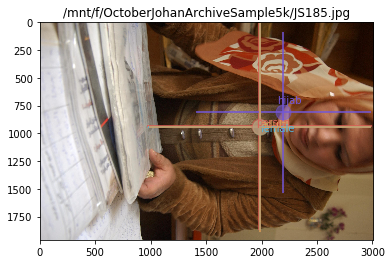

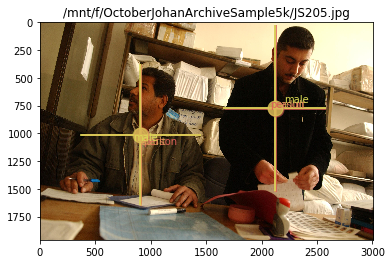

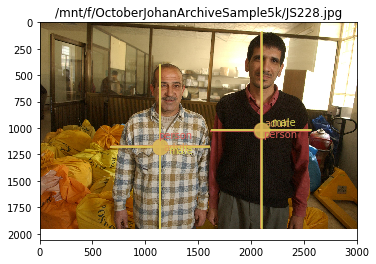

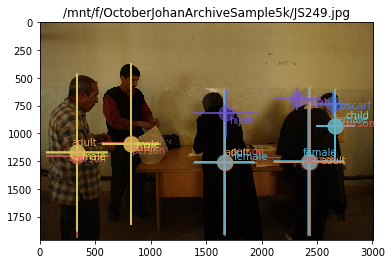

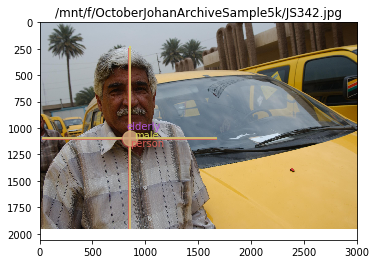

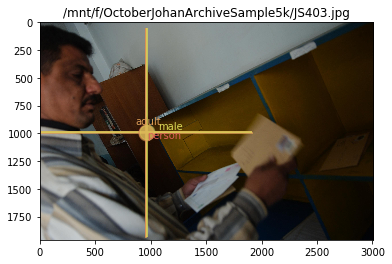

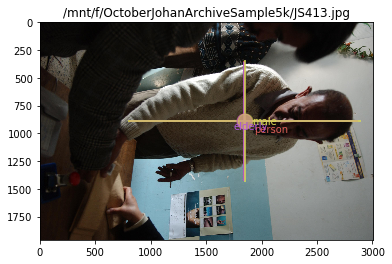

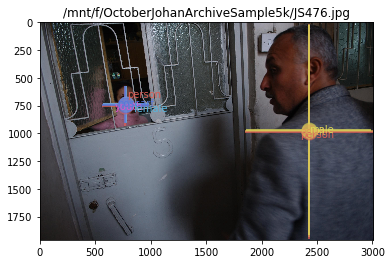

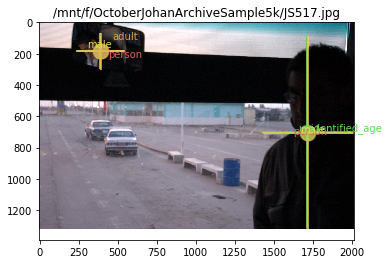

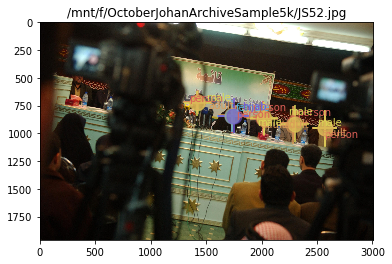

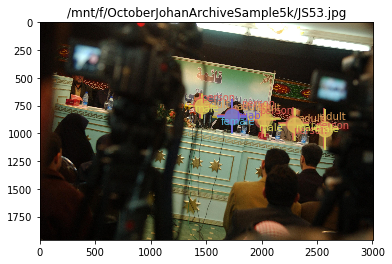

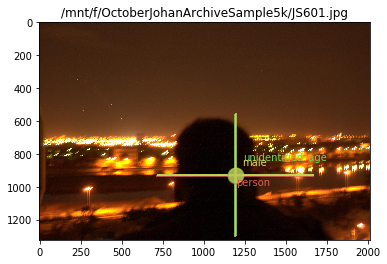

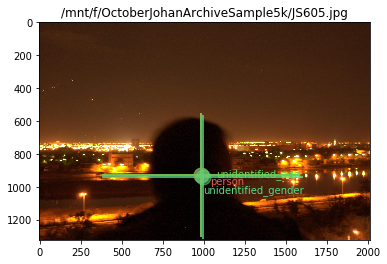

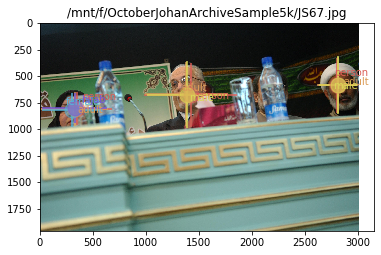

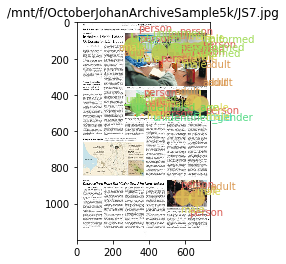

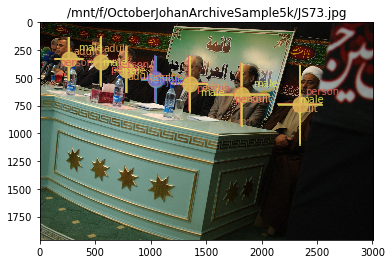

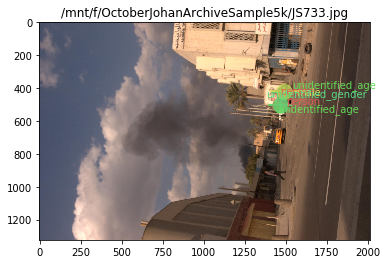

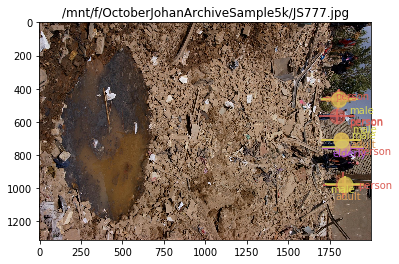

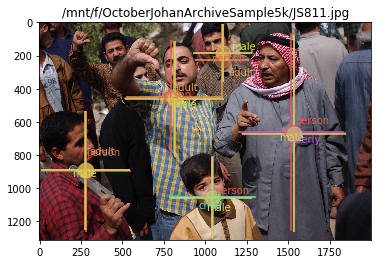

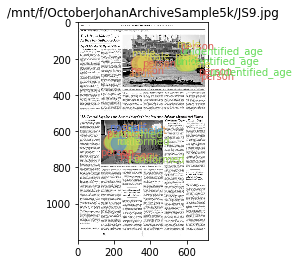

In [14]:
show_images(images, classes)